## Importando todas bibliotecas usadas

In [12]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 



## Pré-processamento de dados

In [13]:
#set de treinamento
train_data = ImageDataGenerator(rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
training_set = train_data.flow_from_directory('chest_xray/train',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary')

#set de teste
test_data = ImageDataGenerator(rescale=1./255)
test_set = test_data.flow_from_directory('chest_xray/test',
    target_size= (64,64),
    batch_size= 32,
    class_mode='binary',)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Construindo a CNN

In [14]:
cnn = Sequential() #Iniciando a Rede Neural Convolucional

#primeira Camada da convolução 
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3))) #Primeiro número é o filter e o segundo numero é o kernel_size
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Outras camadas da convolução
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


#--> As primeiras camada capturam alguns recursos simples das imagens e as camadas seguintes estão tentando obter recursos mais complexos com base nos simples.

#Flattening
cnn.add(Flatten())

#Full conection
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))

#Compilando a rede
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


## Treinando a CNN

In [15]:
cnn_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
163/163 [==============================] - 196s 1s/step - loss: 0.4475 - accuracy: 0.8044 - val_loss: 0.3566 - val_accuracy: 0.8429
Epoch 2/25
163/163 [==============================] - 72s 442ms/step - loss: 0.2355 - accuracy: 0.9039 - val_loss: 0.2762 - val_accuracy: 0.8846
Epoch 3/25
163/163 [==============================] - 72s 441ms/step - loss: 0.2003 - accuracy: 0.9218 - val_loss: 0.3216 - val_accuracy: 0.8782
Epoch 4/25
163/163 [==============================] - 73s 446ms/step - loss: 0.1803 - accuracy: 0.9258 - val_loss: 0.4781 - val_accuracy: 0.8317
Epoch 5/25
163/163 [==============================] - 72s 444ms/step - loss: 0.1615 - accuracy: 0.9440 - val_loss: 0.3115 - val_accuracy: 0.8782
Epoch 6/25
163/163 [==============================] - 73s 449ms/step - loss: 0.1586 - accuracy: 0.9400 - val_loss: 0.4680 - val_accuracy: 0.8397
Epoch 7/25
163/163 [==============================] - 72s 442ms/step - loss: 0.1575 - accuracy: 0.9423 - val_loss: 0.2667 - val_accu

## Fazendo uma única previsão

In [16]:
test_image = image.load_img('chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'PNEUMONIA'
else:
    prediction = 'NORMAL'

print(prediction)

PNEUMONIA


In [17]:
test_image = image.load_img('chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'PNEUMONIA'
else:
    prediction = 'NORMAL'

print(prediction)

NORMAL


## Visualizando o desempenho do modelo

In [18]:
test_accu = cnn.evaluate_generator(test_set,steps=624)
print('A acurácia do teste é :',test_accu[1]*100, '%')

C:\Users\Beatr\AppData\Local\Temp\ipykernel_20196\4140302514.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_accu = cnn.evaluate_generator(test_set,steps=624)


A acurácia do teste é : 90.06410241127014 %


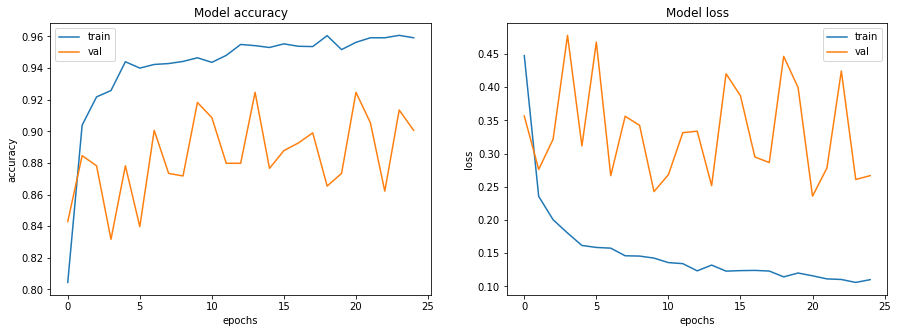

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(cnn_model.history[met])
    ax[i].plot(cnn_model.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

Loss: A scalar value that we attempt to minimize during our training of the model. 
The lower the loss, the closer our predictions are to the true labels.
